## Homework 2 - Visual Data Analytics

In this homework, you are given a seed characteristics dataset. The dataset file is slightly modified and included in the zip file for easier reading (please put it in the same directory as this notebook file). The dataset includes measurements of geometrical properties of kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian (which are represented with group feature). For each group you have 70 instances each. You can find the information about the dataset (here)[info about the dataset https://archive.ics.uci.edu/ml/datasets/seeds]. Answer the seven questions provided below. Provide your remarks as comments.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./seeds_dataset.csv', sep='\t') # info about the dataset https://archive.ics.uci.edu/ml/datasets/seeds
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area                  210 non-null    float64
 1   perimeter             210 non-null    float64
 2   compactness           210 non-null    float64
 3   kernel_length         210 non-null    float64
 4   kernel_width          210 non-null    float64
 5   asymmetry_coef        210 non-null    float64
 6   kernel_groove_length  210 non-null    float64
 7   group                 210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


### Q1 [5 pts] - Create a new parameter 'kgl' for discretizing the 'kernel_groove_length' feature, which can take the values 'high' and 'low'. 
If kernel_groove_length is greater than 5.50, then set 'kgl' to 'high' else, set it to 'low. 

In [3]:
# your answer
df.insert(7,"kgl",df['kernel_groove_length'].apply(lambda x: 'high' if x > 5.5 else 'low'))
df.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coef,kernel_groove_length,kgl,group
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,low,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,low,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,low,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,low,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,low,1


### Q2 [10 pts] - Create an equiwidth histogram for the area feature width 20 bins.  
Color the bars based on 'kgl' attribute you created in Q1. Use stacking or layered bars to identify which area values have high and low kgl levels.

<AxesSubplot:xlabel='area', ylabel='Count'>

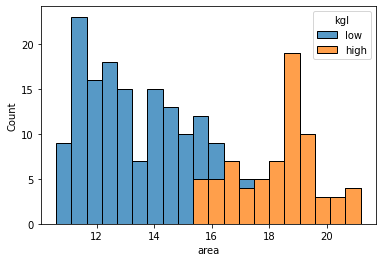

In [4]:
# your answer
sns.histplot(data=df, x="area", hue="kgl", multiple="stack",bins=20)

### Q3 [15 pts] -- Create an equi-frequency histogram plot for 'perimeter' feature using 20 bins. 
Make sure you display the density values and not counts. How is the 'perimeter' feature's values are distributed in this dataset? Identify a candidate probability distribution.

In [5]:
# your answer
def equalbins(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin +1 ),
                     np.arange(nlen),
                     np.sort(x))
perimeter_bin=equalbins(df['perimeter'],20)
perimeter_bin

array([12.41 , 12.86 , 13.02 , 13.14 , 13.32 , 13.45 , 13.55 , 13.72 ,
       13.92 , 14.13 , 14.35 , 14.55 , 14.77 , 14.965, 15.34 , 15.745,
       16.12 , 16.26 , 16.49 , 16.815, 17.25 ])

<AxesSubplot:xlabel='perimeter', ylabel='Density'>

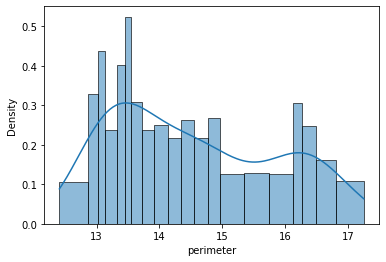

In [6]:
sns.histplot(data=df, x="perimeter", bins=perimeter_bin,stat='density',kde=True)

### Q4 [15 pts] -- Perform a subgroup analysis by visualizing the 'compactness' and 'kgl' features with violinplots. 
Create a set of violinplots for compactness feature for each group (target feature). Violin plots are similar to box plots, but they show the probability density of the data at different values (See [the documentation](https://seaborn.pydata.org/generated/seaborn.violinplot.html)). Split the data using 'kgl' feature. Finally, provide your remarks whether 'kgl' and 'compactness' can be used for predicting the 'group'variable.

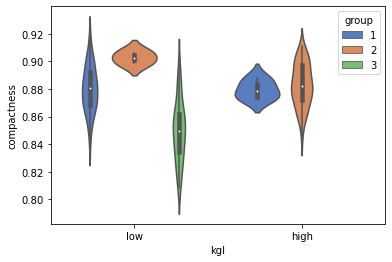

In [7]:
# your answer
ax = sns.violinplot(x="kgl", y="compactness", hue="group",
                    data=df, palette="muted")

From the plot above we can make following inferences:
1. When the feature "kgl" has low values, the values of compactness are distributed in different rangesfor each group. We can define these ranges and can use them for making predictions about each group.
2. However, when kgl feature has high values, the distribution of compactness are overlapping in same ranges (evident from the box plot). Hence, we cannot make any prediction in this case. We can just say that, when kgl value is high, the target feature is definitely not a group 3


Here, we don't have sufficient information avialable through kgl and compactness feature.Using just these two to make prediction about group will not be a good idea. 

### Q5 [15 pts] -- Create a boxplot for asymmetry_coef parameter. 
However, to depict the potential outliers clearly, instead of using (Q1-1.5IQR, Q3+1.5IQR) use only top 5% (interval of 0 to 95 percentile) for placing your whiskers. Identify the potential outlying points thresholds for each group for asymmetry_coef parameter.

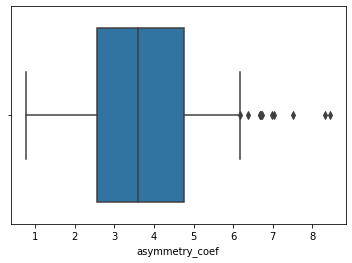

In [8]:
# your answer
ax = sns.boxplot(x=df["asymmetry_coef"],whis=[0,95])

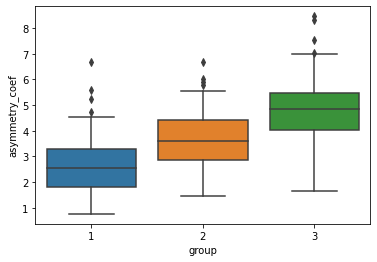

In [9]:
ax = sns.boxplot(x="group", y="asymmetry_coef", data=df,whis=[0,95])

### Q6 [25 pts] - Analyze the relationship between kernel length and kernel width parameter. 
(a) Create a scatter plot (use length and width values for x and y axis), use different colors for instances from different groups. 

(b) Create a bivariate distribution plot and color the bins/cells using the 'group' keyword. A documentation for distplot can be seen [here](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot) or for histplot [here](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot). 

What can you say about the relationship amoung kernel length, kernel width and group features. 


<AxesSubplot:xlabel='kernel_length', ylabel='kernel_width'>

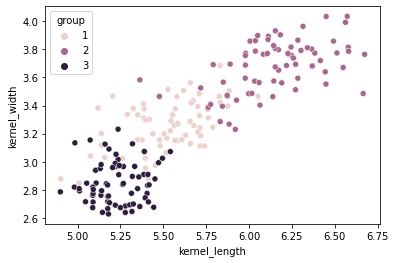

In [10]:
# your answer
sns.scatterplot(data=df, x="kernel_length", y="kernel_width", hue="group")

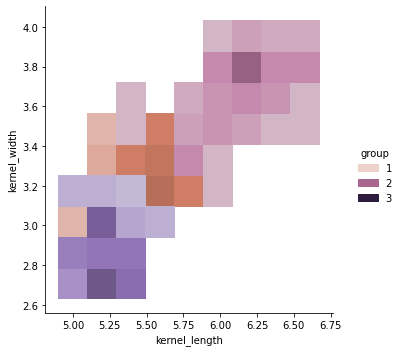

In [11]:
sns.displot(data=df, x="kernel_length", y="kernel_width",hue="group")

For group 3, we can observe most of the values of length & width features have lower values. However, for group 2, both these features have comparatively higher values. The distribution of both the features are clusterred according to the group

#### Q7 [25pts] - Create a star plot for average kernel length, kernel width, perimeter, compactness and area features from each group. 
Each star represents mean kernel length/width, perimeter, compactness and area for one group. 

Which feature's mean value can separate the groups better?  

In [12]:
# your answer
from math import pi
agg_df=pd.DataFrame()
agg_df["Avg_k_len"]=df.groupby("group")["kernel_length"].mean()
agg_df["Avg_k_width"]=df.groupby("group")["kernel_width"].mean()
agg_df["Avg_perim"]=df.groupby("group")["perimeter"].mean()
agg_df["Avg_compact"]=df.groupby("group")["compactness"].mean()
agg_df["Avg_area"]=df.groupby("group")["area"].mean()
agg_df

,Avg_k_len,Avg_k_width,Avg_perim,Avg_compact,Avg_area
group,,,,,
1,5.508057,3.244629,14.294286,0.880070,14.334429
2,6.148029,3.677414,16.135714,0.883517,18.334286
3,5.229514,2.853771,13.247857,0.849409,11.873857


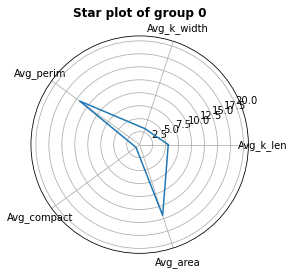

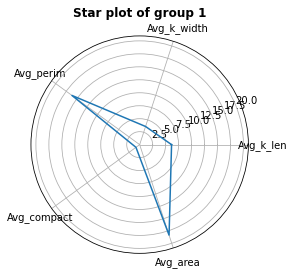

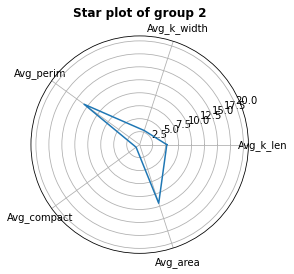

In [13]:
categories=agg_df.columns.tolist()
N=len(categories)
angles=[n/float(N) * 2* pi for  n in range(N)]
angles+=angles[:1]
for i in range(3):
    values=[]
    values=agg_df.iloc[i].to_list()
    values+=values[:1]
    plt.polar(angles,values,20)
    plt.xticks(angles[:-1],categories)
    plt.set_rticks=[0,2,4,6,8,10,12,14,16]
    
    plt.title("Star plot of group" + " " + str(i),
                                    fontweight ="bold")
    plt.show()

    

Average value of feature "area" can be used best to separate groups